# Analytics Vidhya JOB-A-THON

## Problem Statement

### Credit Card Lead Prediction


Happy Customer Bank is a mid-sized private bank that deals in all kinds of banking products, like Savings accounts, Current accounts, investment products, credit products, among other offerings.


The bank also cross-sells products to its existing customers and to do so they use different kinds of communication like tele-calling, e-mails, recommendations on net banking, mobile banking, etc. 



In this case, the Happy Customer Bank wants to cross sell its credit cards to its existing customers. The bank has identified a set of customers that are eligible for taking these credit cards.



Now, the bank is looking for your help in identifying customers that could show higher intent towards a recommended credit card, given:

- Customer details (gender, age, region etc.)
- Details of his/her relationship with the bank (Channel_Code,Vintage, 'Avg_Asset_Value etc.)

# Dataset Description

<style>
        table,
        th,
        td {
          padding: 10px;
          border: 1px solid rgb(187, 85, 85);
          border-collapse: collapse;
        }
        tr {
          text-align: left;
        }
</style>
<center>
<h2>Train Data</h2> 
</center>
<center>  
    <br>
<table>
    <tr>
        <th>Variable</th>
        <th>Definition</th>
    </tr>
    <tr>
        <td>ID</td>
        <td>Unique Identifier for a row</td>
    </tr>
    <tr>
        <td>Gender</td>
        <td>Gender of the Customer</td>
    </tr>
    <tr>
        <td>Age</td>
        <td>Age of the Customer (in Years)</td>
    </tr>
    <tr>
        <td>Region_Code</td>
        <td>Code of the Region for the customers</td>
    </tr>
    <tr>
        <td>Occupation</td>
        <td>Occupation Type for the customer</td>
    </tr>
    <tr>
        <td>JobCity</td>
        <td>Occupation Type for the customer</td>
    </tr>
    <tr>
        <td>Channel_Code</td>
        <td>Acquisition Channel Code for the Customer  (Encoded)</td>
    </tr>
    <tr>
        <td>Vintage</td>
        <td>Vintage for the Customer (In Months)</td>
    </tr>
    <tr>
        <td>Credit_Product</td>
        <td>If the Customer has any active credit product (Home loan,Personal loan, Credit Card etc.)</td>
    </tr>
    <tr>
        <td>Avg_Account_Balance</td>
        <td>Average Account Balance for the Customer in last 12 Months</td>
    </tr>
    <tr>
        <td>Is_Active</td>
        <td>If the Customer is Active in last 3 Months</td>
    </tr>
    <tr>
        <td>Is_Lead(Target)</td>
        <td>If the Customer is interested for the Credit Card
            0 : Customer is not interested
            1 : Customer is interested
        </td>
    <tr>
</table>
</center> 

<style>
        table,
        th,
        td {
          padding: 10px;
          border: 1px solid rgb(187, 85, 85);
          border-collapse: collapse;
        }
        tr {
          text-align: left;
        }
</style>
<center>
<h2>Test Data</h2> 
</center>
<center>  
    <br>
<table>
    <tr>
        <th>Variable</th>
        <th>Definition</th>
    </tr>
    <tr>
        <td>ID</td>
        <td>Unique Identifier for a row</td>
    </tr>
    <tr>
        <td>Gender</td>
        <td>Gender of the Customer</td>
    </tr>
    <tr>
        <td>Age</td>
        <td>Age of the Customer (in Years)</td>
    </tr>
    <tr>
        <td>Region_Code</td>
        <td>Code of the Region for the customers</td>
    </tr>
    <tr>
        <td>Occupation</td>
        <td>Occupation Type for the customer</td>
    </tr>
    <tr>
        <td>JobCity</td>
        <td>Occupation Type for the customer</td>
    </tr>
    <tr>
        <td>Channel_Code</td>
        <td>Acquisition Channel Code for the Customer  (Encoded)</td>
    </tr>
    <tr>
        <td>Vintage</td>
        <td>Vintage for the Customer (In Months)</td>
    </tr>
    <tr>
        <td>Credit_Product</td>
        <td>If the Customer has any active credit product (Home loan,Personal loan, Credit Card etc.)</td>
    </tr>
    <tr>
        <td>Avg_Account_Balance</td>
        <td>Average Account Balance for the Customer in last 12 Months</td>
    </tr>
    <tr>
        <td>Is_Active</td>
        <td>If the Customer is Active in last 3 Months</td>
    </tr>
</table>
</center> 

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

In [2]:
# Avoid Warnings

import warnings

warnings.filterwarnings('ignore')

### Importing Data Modelling libraries

In [3]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier 
from sklearn.linear_model import Ridge,Lasso
from scipy.stats.mstats import winsorize
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

from sklearn.feature_selection import SelectFromModel
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold,KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import ExtraTreeClassifier
import xgboost as xgb
from lightgbm import LGBMClassifier
from sklearn.experimental import enable_hist_gradient_boosting 
from sklearn.ensemble import HistGradientBoostingClassifier, AdaBoostClassifier

### Importing Evaluation Metrics Libraries

In [ ]:
from sklearn.metrics import roc_auc_score ,mean_squared_error,accuracy_score,classification_report,roc_curve,confusion_matrix

### Importing Dataset

In [5]:
# Importing training dataset


# accessing to the folder where the file is stored
path = 'data/train_s3TEQDk.csv'

train = pd.read_csv(path)

In [6]:
# Importing test dataset


# accessing to the folder where the file is stored
path = 'data/test_mSzZ8RL.csv'

test = pd.read_csv(path)

In [7]:
# Display first 10 rows

train.head(10)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0
5,ACUTYTWS,Male,56,RG261,Self_Employed,X1,32,No,544163,Yes,0
6,ETQCZFEJ,Male,62,RG282,Other,X3,20,NaN,1056750,Yes,1
7,JJNJUQMQ,Female,48,RG265,Self_Employed,X3,13,No,444724,Yes,0
8,ZMQFYKCB,Female,40,RG283,Self_Employed,X2,38,No,1274284,No,0
9,NVKTFBA2,Female,55,RG268,Self_Employed,X2,49,Yes,2014239,No,0


In [8]:
# Shape of Training Dataset

print('Shape: {}'.format(train.shape))

print('Number of Rows: {}'.format(train.shape[0]))

print('Number of Columns: {}'.format(train.shape[1]))

Shape: (245725, 11)
Number of Rows: 245725
Number of Columns: 11


In [24]:
# Info about Dataset

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       245725 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


In [9]:
# Target Column

Target_col = 'Is_Lead'

## Identifying Numerical and Categorical columns

In [10]:
# Select Numeric columns from dataset
numeric_data = train.select_dtypes('int64')

# Save numerical columns in a variable 
numeric_cols = numeric_data.columns

print('Numerical Columns')
print('='*20)
print(numeric_data.head(5))

Numerical Columns
   Age  Vintage  Avg_Account_Balance  Is_Lead
0   73       43              1045696        0
1   30       32               581988        0
2   56       26              1484315        0
3   34       19               470454        0
4   30       33               886787        0


In [11]:
# Select Categorical columns from dataset
categorical_data = train.select_dtypes('object')

# Save Categorical columns in a variable 
categorical_cols = categorical_data.columns

print('Categorical Columns')
print('='*20)
print(categorical_data.head(5))

Categorical Columns
         ID  Gender Region_Code     Occupation Channel_Code Credit_Product  \
0  NNVBBKZB  Female       RG268          Other           X3             No   
1  IDD62UNG  Female       RG277       Salaried           X1             No   
2  HD3DSEMC  Female       RG268  Self_Employed           X3             No   
3  BF3NC7KV    Male       RG270       Salaried           X1             No   
4  TEASRWXV  Female       RG282       Salaried           X1             No   

  Is_Active  
0        No  
1        No  
2       Yes  
3        No  
4        No  


In [12]:
# Checking Datatype of All columns:
    
print(train.dtypes)

ID                     object
Gender                 object
Age                     int64
Region_Code            object
Occupation             object
Channel_Code           object
Vintage                 int64
Credit_Product         object
Avg_Account_Balance     int64
Is_Active              object
Is_Lead                 int64
dtype: object


## Check Missing Data

One of the main steps in data preprocessing is handling missing data. Missing data means absence of observations in columns that can be caused while procuring the data, lack of information, incomplete results etc. Feeding missing data to your machine learning model could lead to wrong prediction or classification. Hence it is necessary to identify missing values and treat them.

- In the code below, we calculate the total missing values and the percentage of missing values in every feature of the dataset.
<br>
- The code ideally returns a dataframe consisting of the feature names as index and two columns having the count and percentage of missing values in that feature.

In [13]:
# Checking Null values using isnull()

train.isnull().any()

ID                     False
Gender                 False
Age                    False
Region_Code            False
Occupation             False
Channel_Code           False
Vintage                False
Credit_Product          True
Avg_Account_Balance    False
Is_Active              False
Is_Lead                False
dtype: bool

In [14]:
# Credit_Product column contains null values

# Checking for count of null values in Credit_Product column

count = train.isnull().sum()['Credit_Product']

print('Total number of missing values in Credit_Product column: {}'.format(count))

Total number of missing values in Credit_Product column: 29325


In [15]:
# Finding percentage of missing values in Credit_Product column

percent = (count / len(train['Credit_Product'])) * 100

print('Percentage of missing values: {}'.format(percent))

Percentage of missing values: 11.9340726421813


## Missing Values Treatment


The given dataset is a pretty clean dataset except there exist ~12% of missing data in Credit_Product column.

There are two methods of dealing with missing data

- Dropping them
- Imputing them.

Depending on the case we can allow a specific proportion of missing values, beyond which we might want to drop the variable from analysis.

If the information contained in the variable is not that high, we can drop the variable if it has more than 50% missing values.

<b>Credit_Product is missing in ~12% of cases, but we can benefit by imputing them rather than ignoring the variable.</b>
`

In [16]:
# Here we are imputing the missing values with the most frequenct values that is Mode of Credit_Product column.

# Train Data
train['Credit_Product'].fillna('Yes',inplace=True)

In [56]:
# Test Data
test['Credit_Product'].fillna('Yes',inplace=True)

In [17]:
print(train['Credit_Product'].isnull().any())

False


## Fill null values in continuous features

There are no null values in any of the continuous columns in this dataset. But when null values exist in a continuous column, a good approach would be to impute them.

There exists many approach to missing-data imputation and they usually depend on the problem and how the data algorithm behaves. If the features are numeric we can use simple approaches, such as average values and sampling from the feature distribution.

Missing values in continuous data are mostly imputed using mean or median but is totally dependent on us and our problem

In [18]:
# imputing missing values with mean

for col in numeric_data:
    
    mean = train[col].mean()
    
    train[col].fillna(mean,inplace = True)

In [20]:
train.isnull().any()

ID                     False
Gender                 False
Age                    False
Region_Code            False
Occupation             False
Channel_Code           False
Vintage                False
Credit_Product         False
Avg_Account_Balance    False
Is_Active              False
Is_Lead                False
dtype: bool

## Check for Class Imbalance

Class imbalance occurs when the observations belonging to one class in the target are significantly higher than the other class or classes.

`A class distribution of 80:20 or greater is typically considered as an imbalance for a binary classification.`

Since most machine learning algorithms assume that data is equally distributed, applying them on imbalanced data often results in bias towards majority classes and poor classification of minority classes. Hence we need to identify & deal with class imbalance.

In [21]:
#The code below that takes the target variable and outputs the distribution of classes in the target.

# we are finding the percentage of each class in the feature 'y'
class_values = (train['Is_Lead'].value_counts()/train['Is_Lead'].value_counts().sum())*100

print(class_values)

0    76.279174
1    23.720826
Name: Is_Lead, dtype: float64


### Observation:

- As the Class Ratio of Target Variable is 76:24 ,hence class isn't that much imbalanced

## Detecting outliers in the continuous columns

Outliers are observations that lie far away from majority of observations in the dataset and can be represented mathematically in different ways.

One method of defining outliers are: outliers are data points lying beyond (third quartile + 1.5xIQR) and below (first quartile - 1.5xIQR).

The code below takes a dataframe and outputs the number of outliers in every numeric feature based on the above rule of IQR

In [22]:
cols = list(train) # A List of all features

outliers = pd.DataFrame(columns=['Feature','Number of Outliers','Percentage']) # Creating a new dataframe to

for column in numeric_cols: # Iterating thorough each feature            
        # first quartile (Q1)
        q1 = train[column].quantile(0.25) 
            
        # third quartile (Q3)
        q3 = train[column].quantile(0.75)
            
        # IQR
        iqr = q3 - q1
        
        fence_low = q1 - (1.5*iqr)
        
        fence_high = q3 + (1.5*iqr)
        
        # finding the number of outliers using 'and(|) condition. 
        total_outlier = train[(train[column] < fence_low) | (train[column] > fence_high)].shape[0]
        
        # finding percentage of outliers
        percent = (total_outlier / len(train[column]))*100
        
        outliers = outliers.append({'Feature':column,'Number of Outliers':total_outlier,'Percentage':percent},ignore_index=True)
        
outliers

,Feature,Number of Outliers,Percentage
0,Age,0,0.000000
1,Vintage,0,0.000000
2,Avg_Account_Balance,14612,5.946485
3,Is_Lead,58288,23.720826


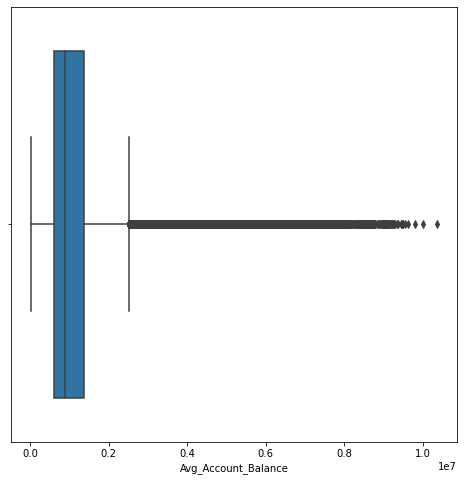

In [31]:
# Plotting Boxplot
plt.figure(figsize=(8,8))

sns.boxplot(train['Avg_Account_Balance'])

plt.show()

# Exploratory Data Analysis

## Univariate Analysis

In [ ]:
# Plotting Distplot to depict probability density function of Avg_Account_Balance column

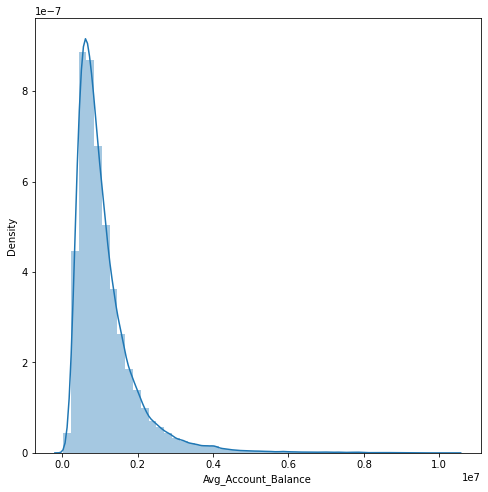

In [30]:
plt.figure(figsize=(8,8))

sns.distplot(train['Avg_Account_Balance'])

plt.show()

# Observation:

- The Distribution appears to be a <b>Log Normal Distribution</b> due to heavy presence of positive outliers(right) 

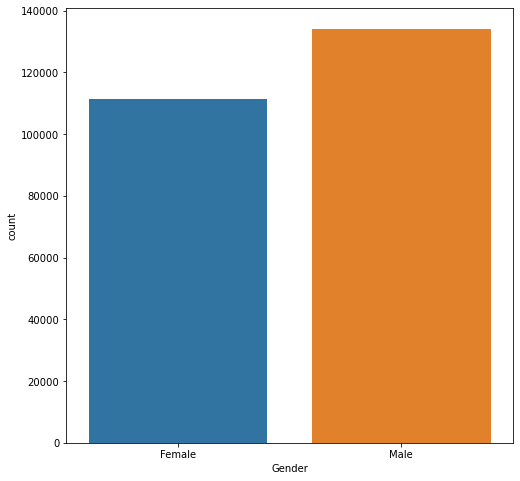

In [32]:
# Gender Distribution CountPlot

plt.figure(figsize=(8,8))

sns.countplot(train['Gender'])

plt.show()

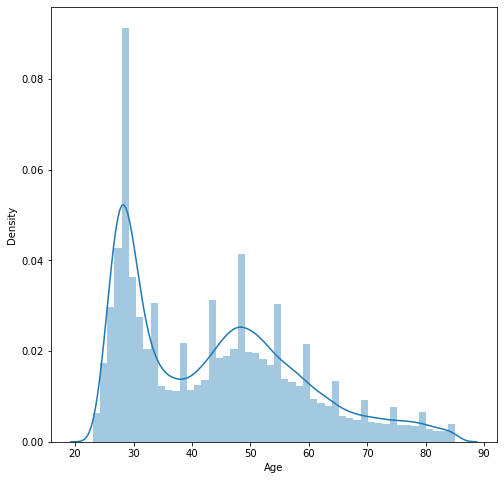

In [35]:
# Age Distribution PDF Plot

plt.figure(figsize=(8,8))

sns.distplot(train['Age'])

plt.show()

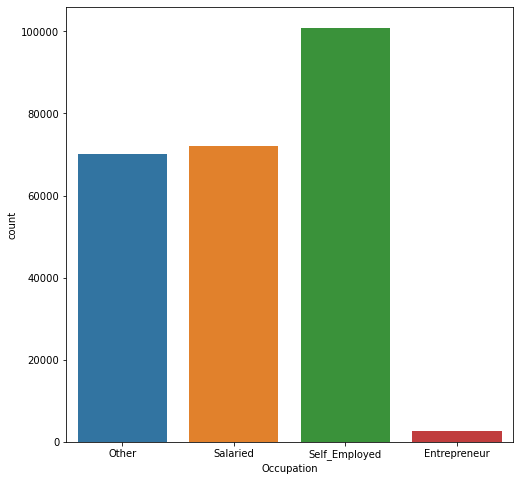

In [37]:
# Occupation CountPlot

plt.figure(figsize=(8,8))

sns.countplot(train['Occupation'])

plt.show()

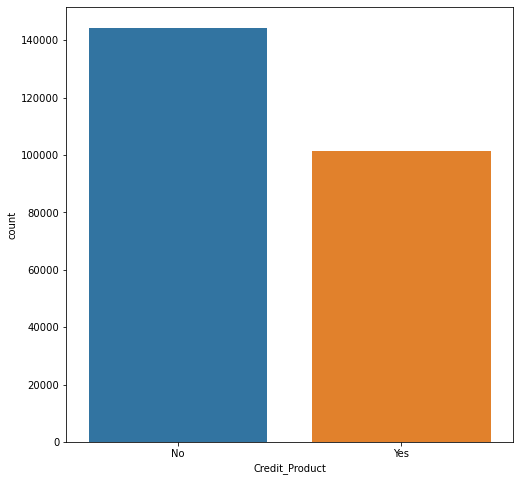

In [38]:
# Credit Product CountPlot

plt.figure(figsize=(8,8))

sns.countplot(train['Credit_Product'])

plt.show()

## Bivariate Analysis

In [36]:
train.columns

Index(['ID', 'Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code',
       'Vintage', 'Credit_Product', 'Avg_Account_Balance', 'Is_Active',
       'Is_Lead'],
      dtype='object')

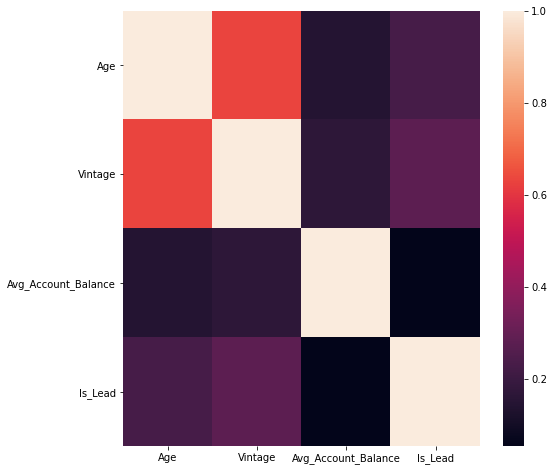

In [41]:
# Plotting Heatmap to detect correlation between features

plt.figure(figsize=(8,8))

sns.heatmap(train.corr())

plt.show()

# Observations

- Vintage and Age is positively correlated with each other


- Is_Lead and Avg_Account_Balance are not at all correlated with each other (correlation ~ 0)

<Figure size 576x576 with 0 Axes>

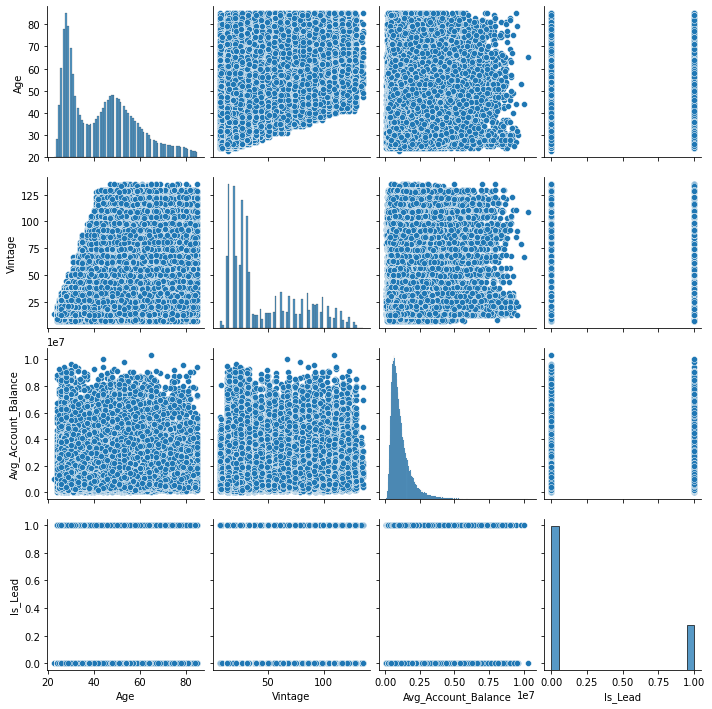

In [44]:
# Pairplot

plt.figure(figsize=(8,8))

sns.pairplot(train)

plt.show()

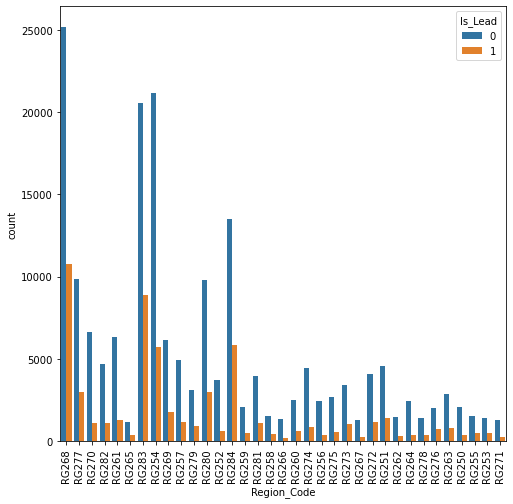

In [46]:
# Region Code with hue as Is_Lead

plt.figure(figsize=(8,8))

sns.countplot(data=train,x='Region_Code', hue='Is_Lead')

plt.xticks(rotation = 90)

plt.show()

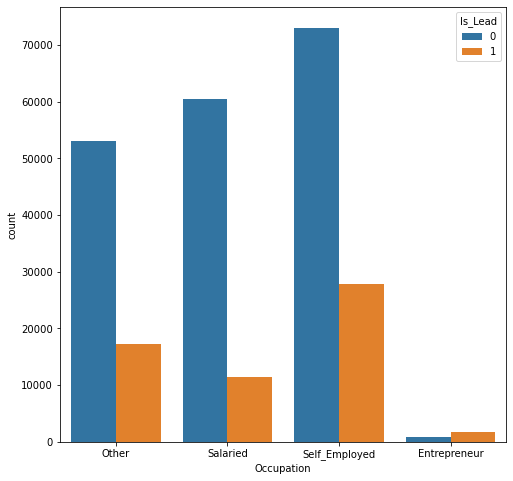

In [48]:
# Is_Lead with reference to Occupation

plt.figure(figsize=(8,8))

sns.countplot(data=train,x='Occupation', hue='Is_Lead')

plt.show()

<AxesSubplot:xlabel='Vintage', ylabel='Avg_Account_Balance'>

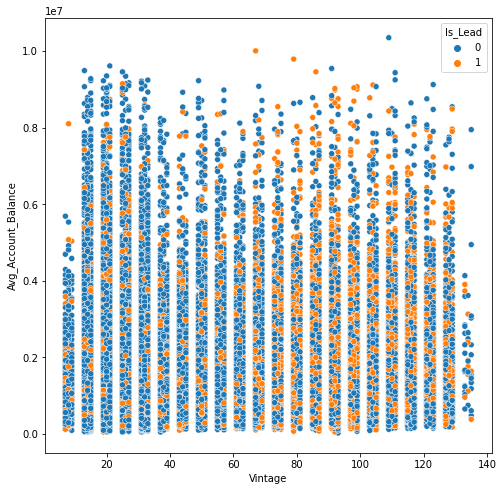

In [51]:
# Scatter Plot between Avg_Account_Balance & Vintage with respect to Is_Lead

plt.figure(figsize=(8,8))

sns.scatterplot(data=train,x='Vintage', y='Avg_Account_Balance', hue='Is_Lead')

plt.show()

## Data Preprocessing using Label Encoder

In [54]:
# Categorical Columns

categorical_cols

Index(['ID', 'Gender', 'Region_Code', 'Occupation', 'Channel_Code',
       'Credit_Product', 'Is_Active'],
      dtype='object')

In [57]:
# Initializing lable encoder
le = LabelEncoder()

# Iterating through each of the categorical columns and label encoding them
for feature in categorical_data[1:]:
    try:
        train[feature] = le.fit_transform(train[feature])
        test[feature] = le.fit_transform(test[feature])   
    except:
        print('Error encoding '+feature)

In [15]:
from scipy import stats

In [16]:
from sklearn.preprocessing import KBinsDiscretizer

est = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')

est.fit(train['Age'].values.reshape(-1,1))

train['Age_quantiles'] = est.transform(train['Age'].values.reshape(-1,1)).astype(int)

test['Age_quantiles'] = est.transform(test['Age'].values.reshape(-1,1)).astype(int)

In [17]:
from sklearn.preprocessing import KBinsDiscretizer

est = KBinsDiscretizer(n_bins=22, encode='ordinal', strategy='quantile')

est.fit(train['Vintage'].values.reshape(-1,1))

train['Vintage_quantiles'] = est.transform(train['Vintage'].values.reshape(-1,1)).astype(int)

test['Vintage_quantiles'] = est.transform(test['Vintage'].values.reshape(-1,1)).astype(int)

In [19]:
train.columns

Index(['ID', 'Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code',
       'Vintage', 'Credit_Product', 'Avg_Account_Balance', 'Is_Active',
       'Is_Lead', 'Age_quantiles', 'Vintage_quantiles'],
      dtype='object')

In [21]:
# Training and Testing Data

selected_columns = ['Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code',
       'Vintage', 'Credit_Product', 'Avg_Account_Balance', 'Is_Active']

train = train.fillna(2)

test = test.fillna(2)

X = train[selected_columns]

y = train[Target_col].values

X_test = test[selected_columns]

new_x = train[selected_columns+[Target_col]]

In [ ]:
# Import fastai

from fastai.tabular.all import *

from fastai.tabular import *

In [26]:
cat_names = ['Gender', 'Region_Code' , 'Occupation', 'Channel_Code', 'Credit_Product','Is_Active']

cont_names = ['Age', 'Vintage', 'Avg_Account_Balance']

procs = [Categorify, FillMissing, Normalize]

In [24]:
def roc_auc(y_hat, y):
    
    return torch.tensor(roc_auc_score( y.cpu(), y_hat.cpu()),device='cuda:0')

In [27]:
# predictions = np.zeros(test.shape[0])

predictions = np.zeros(X_test.shape[0])

oobs = np.zeros(train.shape[0])

y = train[Target_col].values

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for i, (train_id, valid_id) in enumerate(skf.split(X,y)):
    
    X_valid= X.iloc[valid_id]
    
    ssd = IndexSplitter(list(valid_id))
    
    to = TabularPandas(new_x, procs=procs,
                    cat_names =cat_names,
                    cont_names = cont_names,
                    y_names='Is_Lead',
                    splits=ssd(X.index))
    
    dls = to.dataloaders(bs=64)
    
    learn = tabular_learner(dls, metrics=roc_auc)
    
    learn.fit_one_cycle(10,cbs=[SaveModelCallback(monitor='roc_auc', fname='shri')])
    
    learn.load('./shri')
    
    valid_dl = learn.dls.test_dl(X_valid)
    
    oobs[valid_id] = np.ravel(learn.get_preds(dl=valid_dl)[0])
    
    test_dl = learn.dls.test_dl(X_test)
    
    predictions += np.ravel(learn.get_preds(dl=test_dl)[0])

epoch,train_loss,valid_loss,roc_auc,time
0,0.116472,0.108109,0.862212,00:29
1,0.115237,0.110778,0.865471,00:28
2,0.107156,0.105106,0.866262,00:28
3,0.109822,0.105648,0.867821,00:28
4,0.107048,0.104211,0.871245,00:28
5,0.103007,0.104004,0.873078,00:28
6,0.106063,0.103583,0.873997,00:28
7,0.104996,0.103437,0.873735,00:28
8,0.106615,0.103340,0.874045,00:29
9,0.105267,0.103313,0.874314,00:30


Better model found at epoch 0 with roc_auc value: 0.8622118323110901.
Better model found at epoch 1 with roc_auc value: 0.8654707278653695.
Better model found at epoch 2 with roc_auc value: 0.8662621315393024.
Better model found at epoch 3 with roc_auc value: 0.8678210789938844.
Better model found at epoch 4 with roc_auc value: 0.8712451935852528.
Better model found at epoch 5 with roc_auc value: 0.8730783117819855.
Better model found at epoch 6 with roc_auc value: 0.8739968688826377.
Better model found at epoch 8 with roc_auc value: 0.8740452723547127.
Better model found at epoch 9 with roc_auc value: 0.8743138275557174.


/usr/local/lib/python3.7/dist-packages/fastai/learner.py:56: UserWarning: Saved filed doesn't contain an optimizer state.
  elif with_opt: warn("Saved filed doesn't contain an optimizer state.")


epoch,train_loss,valid_loss,roc_auc,time
0,0.111931,0.112455,0.858353,00:29
1,0.112956,0.111464,0.850037,00:28
2,0.105539,0.108468,0.861125,00:28
3,0.112172,0.106423,0.869378,00:28
4,0.102709,0.105021,0.869257,00:28
5,0.104605,0.104602,0.870735,00:29
6,0.107732,0.104891,0.869952,00:29
7,0.104415,0.104673,0.870957,00:29
8,0.107145,0.104479,0.871549,00:29
9,0.108926,0.104504,0.871267,00:28


Better model found at epoch 0 with roc_auc value: 0.8583525178892448.
Better model found at epoch 2 with roc_auc value: 0.8611254024468867.
Better model found at epoch 3 with roc_auc value: 0.8693779379625134.
Better model found at epoch 5 with roc_auc value: 0.870734940414583.
Better model found at epoch 7 with roc_auc value: 0.8709574848663545.
Better model found at epoch 8 with roc_auc value: 0.8715488797667884.


/usr/local/lib/python3.7/dist-packages/fastai/learner.py:56: UserWarning: Saved filed doesn't contain an optimizer state.
  elif with_opt: warn("Saved filed doesn't contain an optimizer state.")


epoch,train_loss,valid_loss,roc_auc,time
0,0.114615,0.119789,0.838457,00:28
1,0.109009,0.106209,0.868025,00:29
2,0.112201,0.108982,0.859073,00:28
3,0.104150,0.105012,0.871410,00:28
4,0.108492,0.105260,0.870782,00:28
5,0.103693,0.104963,0.871576,00:28
6,0.110613,0.104433,0.871694,00:28
7,0.105761,0.104282,0.871867,00:28
8,0.104506,0.104215,0.872501,00:29
9,0.100603,0.104277,0.872771,00:29


Better model found at epoch 0 with roc_auc value: 0.8384574207935637.
Better model found at epoch 1 with roc_auc value: 0.8680245071715365.
Better model found at epoch 3 with roc_auc value: 0.8714100593943299.
Better model found at epoch 5 with roc_auc value: 0.8715763083578179.
Better model found at epoch 6 with roc_auc value: 0.8716944220981733.
Better model found at epoch 7 with roc_auc value: 0.8718674888159968.
Better model found at epoch 8 with roc_auc value: 0.8725013623613872.
Better model found at epoch 9 with roc_auc value: 0.8727705784309578.


/usr/local/lib/python3.7/dist-packages/fastai/learner.py:56: UserWarning: Saved filed doesn't contain an optimizer state.
  elif with_opt: warn("Saved filed doesn't contain an optimizer state.")


epoch,train_loss,valid_loss,roc_auc,time
0,0.121407,0.112486,0.853379,00:29
1,0.111073,0.114196,0.833079,00:29
2,0.104850,0.108806,0.856687,00:29
3,0.108907,0.104832,0.871487,00:29
4,0.109646,0.104822,0.871975,00:29
5,0.104874,0.104826,0.872129,00:29
6,0.107844,0.105035,0.870851,00:29
7,0.104005,0.105008,0.869968,00:29
8,0.109943,0.104408,0.873415,00:29
9,0.102827,0.104413,0.873275,00:29


Better model found at epoch 0 with roc_auc value: 0.8533793242791137.
Better model found at epoch 2 with roc_auc value: 0.8566871919004762.
Better model found at epoch 3 with roc_auc value: 0.8714865902244683.
Better model found at epoch 4 with roc_auc value: 0.8719746006334478.
Better model found at epoch 5 with roc_auc value: 0.8721293695825331.
Better model found at epoch 8 with roc_auc value: 0.8734152198593734.


/usr/local/lib/python3.7/dist-packages/fastai/learner.py:56: UserWarning: Saved filed doesn't contain an optimizer state.
  elif with_opt: warn("Saved filed doesn't contain an optimizer state.")


epoch,train_loss,valid_loss,roc_auc,time
0,0.115859,0.109603,0.861585,00:29
1,0.107842,0.106222,0.866063,00:29
2,0.106248,0.110004,0.851482,00:29
3,0.106966,0.105816,0.868185,00:29
4,0.109901,0.105227,0.872309,00:29
5,0.108937,0.104824,0.871103,00:29
6,0.104359,0.104289,0.871744,00:29
7,0.104795,0.103937,0.872639,00:29
8,0.106682,0.103871,0.872831,00:29
9,0.109044,0.104025,0.872680,00:29


Better model found at epoch 0 with roc_auc value: 0.8615852378756998.
Better model found at epoch 1 with roc_auc value: 0.8660629965365207.
Better model found at epoch 3 with roc_auc value: 0.8681848715539234.
Better model found at epoch 4 with roc_auc value: 0.8723089360898143.
Better model found at epoch 7 with roc_auc value: 0.8726390003198633.
Better model found at epoch 8 with roc_auc value: 0.8728308535329071.


/usr/local/lib/python3.7/dist-packages/fastai/learner.py:56: UserWarning: Saved filed doesn't contain an optimizer state.
  elif with_opt: warn("Saved filed doesn't contain an optimizer state.")


In [29]:
roc_auc = roc_auc_score(y,oobs)

print(roc_auc)

finals = predictions/5

fastai_preds = finals

sample_test[Target_col] = fastai_preds

sample_test.to_csv('SubmitFile.csv', index=False)

#sample_test[Target_col] = fastai_preds

0.8725660871371108


In [18]:
SubmitFile

In [30]:
!cp SubmitFile.csv "drive/My Drive/"

In [18]:
# The End